In [1]:
%matplotlib inline

/home/csantos/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian, median


from skimage import data, color, transform
from skimage.transform import rescale, resize, downscale_local_mean



def mostra_imagem_cinza(data, figsize=(5,5)):
  """Uma função auxiliar para exibir uma imagem em níveis de cinza"""
  f = plt.figure(figsize=figsize)
  ax_img = f.gca()
  ax_img.imshow(data, cmap=plt.cm.gray)
  ax_img.set_axis_off()
  return (f, ax_img)

imagem = color.rgb2gray(data.astronaut())

# Transformações Geométricas

Até agora trabalhamos com transformações que afetam os valores dos *pixels* de uma imagem. Na aula de hoje vamos trabalhar com transformações que afetam as *coordenadas* dos pixels da imagem.

Vamos denotar por $(u, v)$ as coordenadas (linha, coluna) dos pixels de uma imagem de entrada $f(u, v)$. Denotamos por $(x, y)$ as coordenadas de uma imagem de saída $g(x, y)$. Queremos relacionar as coordenadas $(x, y)$ com $(u, v)$ por meio de uma transformação.

### Exemplo: Translação

Se quisermos produzir uma versão de $f(u, v)$ transladada de $j$ pixels para a direita e $k$ pixels para a baixo, devemos fazer
$\begin{cases}x = u + k\\ y = v + j\\\end{cases}$.

Ou, de maneira equivalente $\begin{cases}u = x - k\\ v = y - j\\\end{cases}$.

Desse modo obtemos $g(x, y) = f(x - k, y - j)$

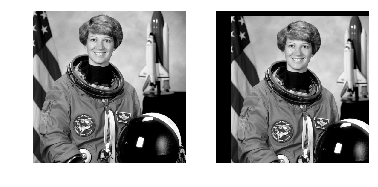

In [3]:
# exemplo de tranlação
k = 20
j = 50
linhas, colunas = imagem.shape
# vamos criar uma imagem de mesmo tamanho da original, preenchida por zeros
g = np.zeros_like(imagem)

g[k:linhas, j:colunas] = imagem[0:linhas-k, 0:colunas-j]

figura, (aximg, axg) = plt.subplots(nrows=1, ncols=2)
aximg.imshow(imagem, cmap=plt.cm.gray)
aximg.set_axis_off()
axg.imshow(g, cmap=plt.cm.gray)
axg.set_axis_off()




#### **Exercício:** Altere os valores de $j$ e $k$ no trecho acima e observer o resultado.

De maneira geral, podemos escrever:
$$x = x(u, v)$$
$$y = y(u, v)$$
para o mapeamento direto (das coordenadas de $f$ para as coordenadas de $g$) e 
$$u = u(x, y)$$
$$v = v(x, y)$$
para o mapeamento inverso. Consequentemente, temos:
$$\begin{cases}f(u, v) = g(x(u, v), y(u, v))\end{cases}$$
$$\begin{cases}g(x, y) = f(u(x, y), v(x, y))\end{cases}$$

### Exemplo: transformação de escala

Em uma transformação de escala temos:
$$x = s_xu$$
$$y = s_yv$$
e a transformação inversa é dada por:
$$u = x/s_x$$
$$v = y/s_x$$
com $s_x, s_y \in \mathrm{R}$, $s_x, s_y > 0$. Para $s_x, s_y < 1$ temos uma operação de redução, enquanto $s_x, s_y > 1$ resulta em um operação de ampliação.

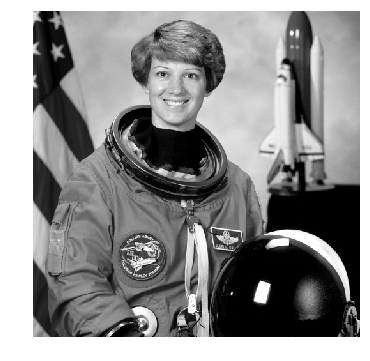

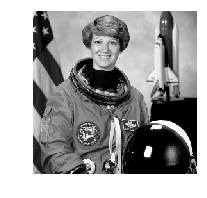

In [4]:
# vamos fazer uma redução de 1/2 em cada dimensão
l2 = int(np.floor(linhas/2))
c2 = int(np.floor(colunas/2))
imagem_reduzida = np.zeros((l2, c2), dtype=imagem.dtype)
imagem_reduzida[0:l2, 0:c2] = imagem[0:2*l2:2, 0:2*c2:2]

mostra_imagem_cinza(imagem, figsize=(6,6));
mostra_imagem_cinza(imagem_reduzida, figsize=(3,3));

Ao fazermos a redução de uma imagem da maneira acima, alguns artefatos podem surgir. Na visualização abaixo, note como alguns contornos adquirema a aparência de serrilhado. Isso é decorrência do fenômeno conhecido como *aliasing*. O *aliasing* acontece quando tentamos subamostrar componentes de frequência mais alta de um sinal ou imagem.

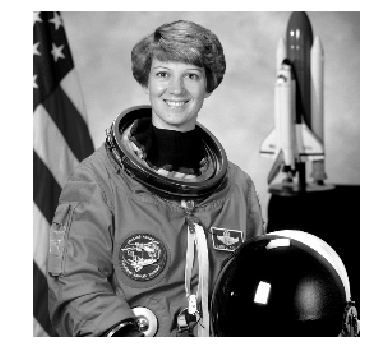

In [5]:
mostra_imagem_cinza(imagem_reduzida, figsize=(6,6));

Para entender como o *aliasing* ocorre, vamos observar primeiro o que acontece quando subamostramos um sinal de frequência relativamente baixa.

Pontos amostragem:
[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]


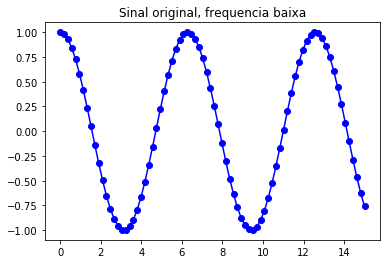

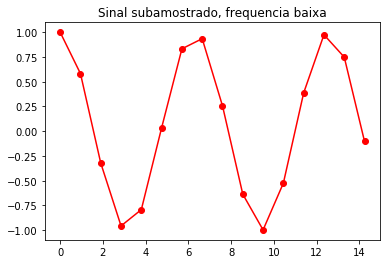

In [6]:
# nosso sinal será uma função de t
t_max = 15
t = np.linspace(0, t_max, 80)
numero_pontos = len(t)

# esse é o fator que vamos usar para subamostrar o sinal
# significa que vamos tomar uma amostra a cada 5
fator_amostragem = 5
indice_amostragem = np.arange(0, len(t), fator_amostragem)
print("Pontos amostragem:")
print(indice_amostragem)

# gerando o sinal de frequência baixa (cosseno)
yt1 = np.cos(t)
f = plt.figure()
ax = f.gca()
plt.plot(t, yt1, 'bo-');
ax.set_title('Sinal original, frequencia baixa')

# agora vamos mostrar o sinal subamostrado
f = plt.figure()
ax = f.gca()
plt.plot(t[indice_amostragem], yt1[indice_amostragem], 'ro-');
ax.set_title('Sinal subamostrado, frequencia baixa');



Note que apesar do número menor de pontos, ainda é possível reconhecer que tanto o sinal original quanto o sinal subamostrado têm a mesma frequência.
Agora vamos repetir o procedimento, mas agora tomando um sinal de frequência maior.

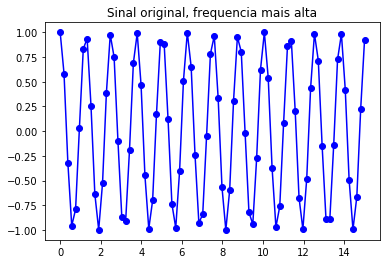

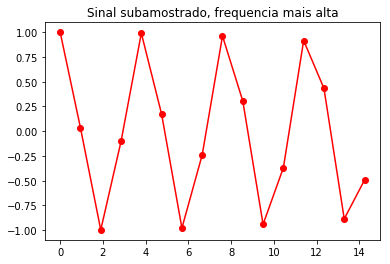

In [7]:
f = plt.figure()
ax = f.gca()
yt2 = np.cos(5*t)
plt.plot(t, yt2, 'bo-');
ax.set_title('Sinal original, frequencia mais alta')

f = plt.figure()
ax = f.gca()
plt.plot(t[indice_amostragem], yt2[indice_amostragem], 'ro-');
ax.set_title('Sinal subamostrado, frequencia mais alta');

Note que agora o sinal subamostrado parece ter uma frequência menor que o sinal original.

Para evitar o efeito de *aliasing*, é usual aplicar um filtro de suavização à imagem antes de realizar a subamostragem.


imagem_reduzida_anti_alias = np.zeros((l2, c2), dtype=imagem.dtype)
imagem_reduzida_anti_alias[0:l2, 0:c2] = imagem_suavizada[0:2*l2:2, 0:2*c2:2]
imagem_suavizada = 


mostra_imagem_cinza(imagem_suavizada, figsize=(6,6));
mostra_imagem_cinza(imagem_reduzida_anti_alias, figsize=(3,3));

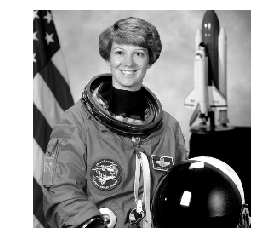

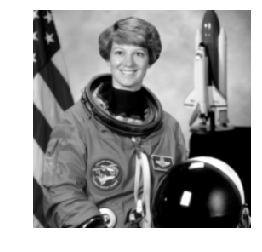

In [8]:
imagem_reduzida_anti_alias = np.zeros((l2, c2), dtype=imagem.dtype) 
imagem_suavizada = gaussian(imagem, sigma=1.5)
imagem_reduzida_anti_alias[0:l2, 0:c2] = imagem_suavizada[0:2*l2:2, 0:2*c2:2] 

mostra_imagem_cinza(imagem_reduzida, figsize=(4,4)); 
mostra_imagem_cinza(imagem_reduzida_anti_alias, figsize=(4,4));


## Tansformações geométricas no scikit image

O scikit image contem um módulo chamado transform que implementa uma série de transformações geométricas.

Abaixo vamos ver um exemplo de transformação de escala.

/home/csantos/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/csantos/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/csantos/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


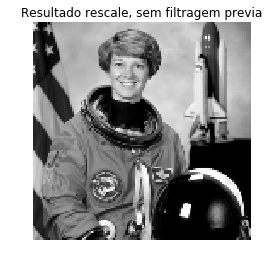

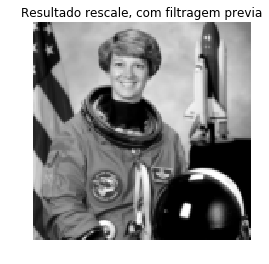

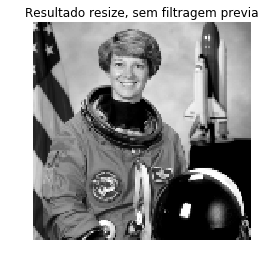

In [9]:
fator_escala = 1.0/4.0
image_rescale_alias = rescale(imagem, fator_escala)

figura = plt.figure()
ax1 = figura.gca()
ax1.imshow(image_rescale_alias, cmap=plt.cm.gray)
ax1.set_title("Resultado rescale, sem filtragem previa")
ax1.set_axis_off()

figura = plt.figure()
ax1 = figura.gca()
image_rescale_no_alias = rescale(imagem_suavizada, fator_escala)
ax1.imshow(image_rescale_no_alias, cmap=plt.cm.gray)
ax1.set_title("Resultado rescale, com filtragem previa")
ax1.set_axis_off()

# Nas versoes mais recentes do scikit image e possivel controlar
# a aplicacao ou nao do filtro anti alias
# image_rescale_alias = rescale(imagem, fator_escala)#, anti_aliasing=False)
# image_rescale_no_alias = rescale(imagem, fator_escala, anti_aliasing=True)

# no metodo resize, especificamos o tamanho na nova imagem em vez do fator
# de escala
novo_linhas = imagem.shape[0] / 4
novo_colunas = imagem.shape[1] / 4
image_resized = resize(imagem, (novo_linhas, novo_colunas));
figura = plt.figure()
ax1 = figura.gca()
ax1.imshow(image_resized, cmap=plt.cm.gray);
ax1.set_title("Resultado resize, sem filtragem previa");
ax1.set_axis_off();

### Exercício: No código acima, a aplicação do método resize diretament sobre a imagem original causa o fenômeno de aliasing. Corrija o código para amenizar esse efeito.

### Exercício: Teste diferentes fatores de escala e diferentes tamanhos para a imagem final. Observe o efeito, com ou sem filtragem anti alias (isto é, com ou sem aplicação do filtro de suavização).

#### Rotação

A transformação de rotação do scikit image rotaciona uma imagem em torno de seu centro. O valor da rotação é fornecido em graus.

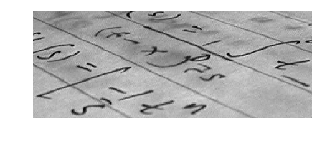

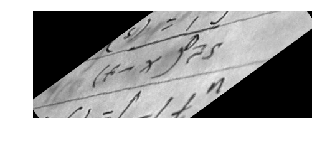

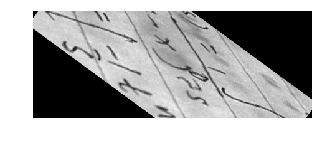

In [10]:
img_texto = data.text()
mostra_imagem_cinza(img_texto)

angulo = 36
texto_rot= transform.rotate(img_texto, angulo);

mostra_imagem_cinza(texto_rot);

texto_rot_inverse = transform.rotate(img_texto, -angulo);

mostra_imagem_cinza(texto_rot_inverse);



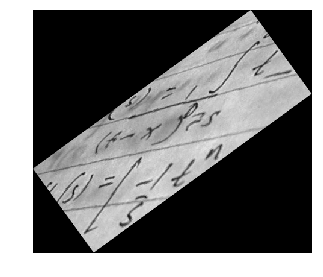

In [11]:
# com o parametro resize, e possivel preservar o conteudo da imagem
# apos a rotacao
texto_rot_resize= transform.rotate(img_texto, angulo, resize=True);

mostra_imagem_cinza(texto_rot_resize);

### Exercício: Teste o código acima, variando o ângulo de rotação.

#### Transformação de Similaridade

A Transformação de Similaridade é um tipo de transformação que combina translação, escala e rotação. No scikit image, podemos especificar esse tipo de transformação por meio da classe SimilarityTransform, como no exemplo abaixo.

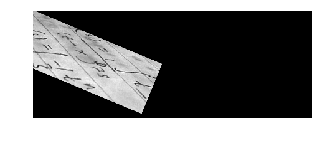

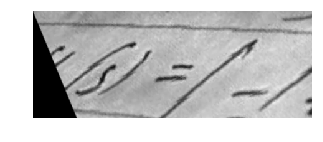

In [12]:
similaridade = transform.SimilarityTransform(scale=0.5, rotation=math.pi/8,
                               translation=(0, 0))




texto_sim = transform.warp(img_texto, similaridade.inverse);

mostra_imagem_cinza(texto_sim);

texto_sim_inverse = transform.warp(img_texto, similaridade);

mostra_imagem_cinza(texto_sim_inverse);

### Exercício: Altere os parâmetros de translação, escala e rotação acima e observe como eles interagem.

### Transformação Afim

As transformações afins constituem uma classe de transformações que estendem a transformação de similaridade e adicionam a possibilidade da deformação de cisalhamento (*shear*). O cisalhamento é um tipo de distorção que simula a aplicação de uma força em sentido paralelo a uma das bordas da imagem, preservando o paralelismo entre retas.

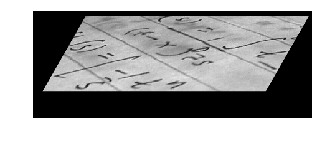

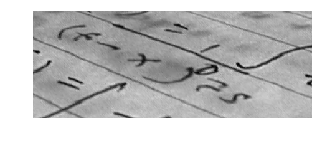

In [13]:
# o cisalhamento (shear) é passado como um valor de angulo
afim = transform.AffineTransform(scale=(0.8, 0.8), rotation=0,
                               translation=(84, 10), shear=math.pi/6)

texto_afim = transform.warp(img_texto, afim.inverse);

mostra_imagem_cinza(texto_afim);

texto_afim_inverse = transform.warp(img_texto, afim);

mostra_imagem_cinza(texto_afim_inverse);

### Exercício: Altere os parâmetros de translação, escala e rotação acima e observe como eles interagem.